__Import libraries for analysis.__

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import warnings

In [331]:
warnings.filterwarnings('ignore')
np.set_printoptions(suppress = True)
%matplotlib inline

In [332]:
# load data
data = pd.read_csv('AAPL.csv')
print(f'Data shape: {data.shape}')
display(data.head())

Data shape: (10836, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600


__Explority Data Analysis and Feature Engineering.__

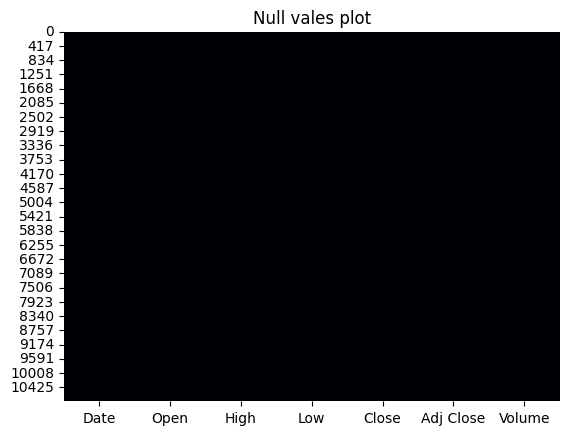

In [333]:
# check null values
sns.heatmap(data = data.isnull(), cmap = 'magma', cbar = False);
plt.title('Null vales plot')
plt.show();

In [334]:
# add 'Change' column as percantage of that day open and close
data['Change'] = (- 100 + (data['Close'] * 100 / data['Open']))

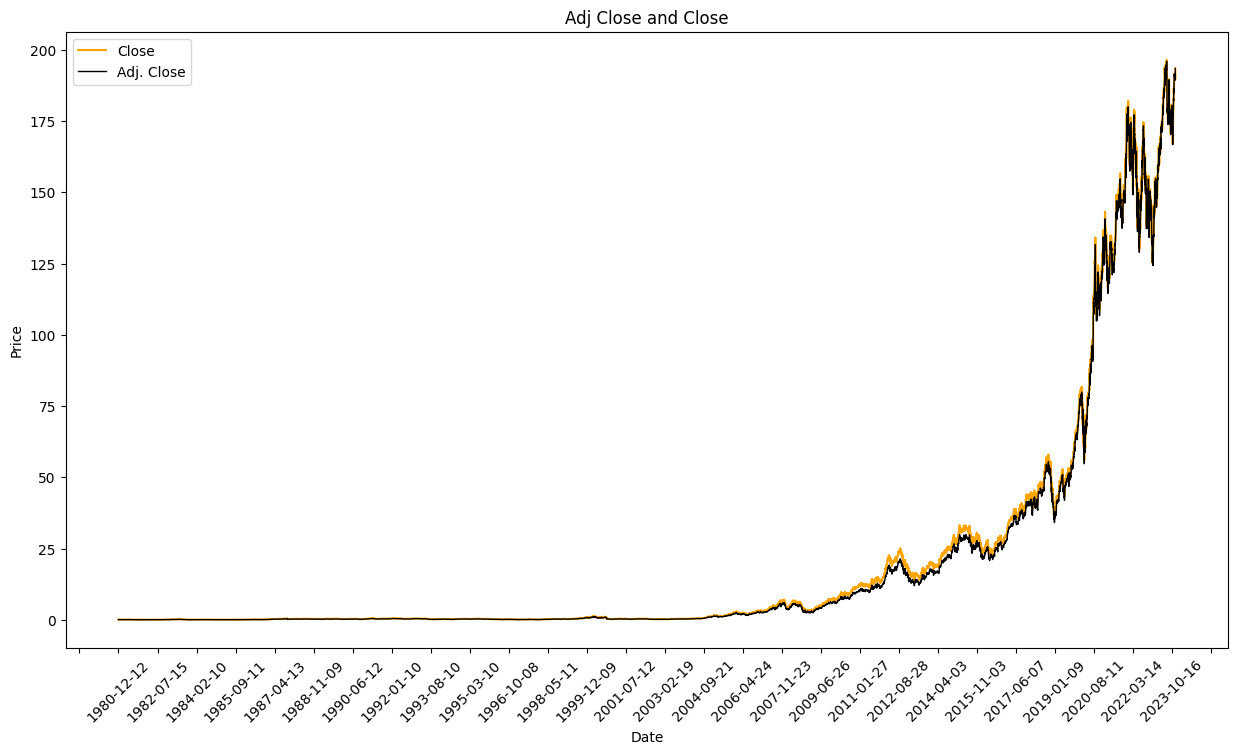

In [335]:
# compromission of Adj.Close and Close by Date
plt.figure(figsize = (15,8))
sns.lineplot(data = data, x = 'Date', y = 'Close', label = 'Close', color = 'orange')
sns.lineplot(data = data, x = 'Date', y = 'Adj Close', label = 'Adj. Close', color = 'black', lw = 1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().xaxis.set_major_locator(MaxNLocator(30))
plt.xticks(rotation = 45)
plt.title('Adj Close and Close')
plt.legend(loc = 'upper left')
plt.show();

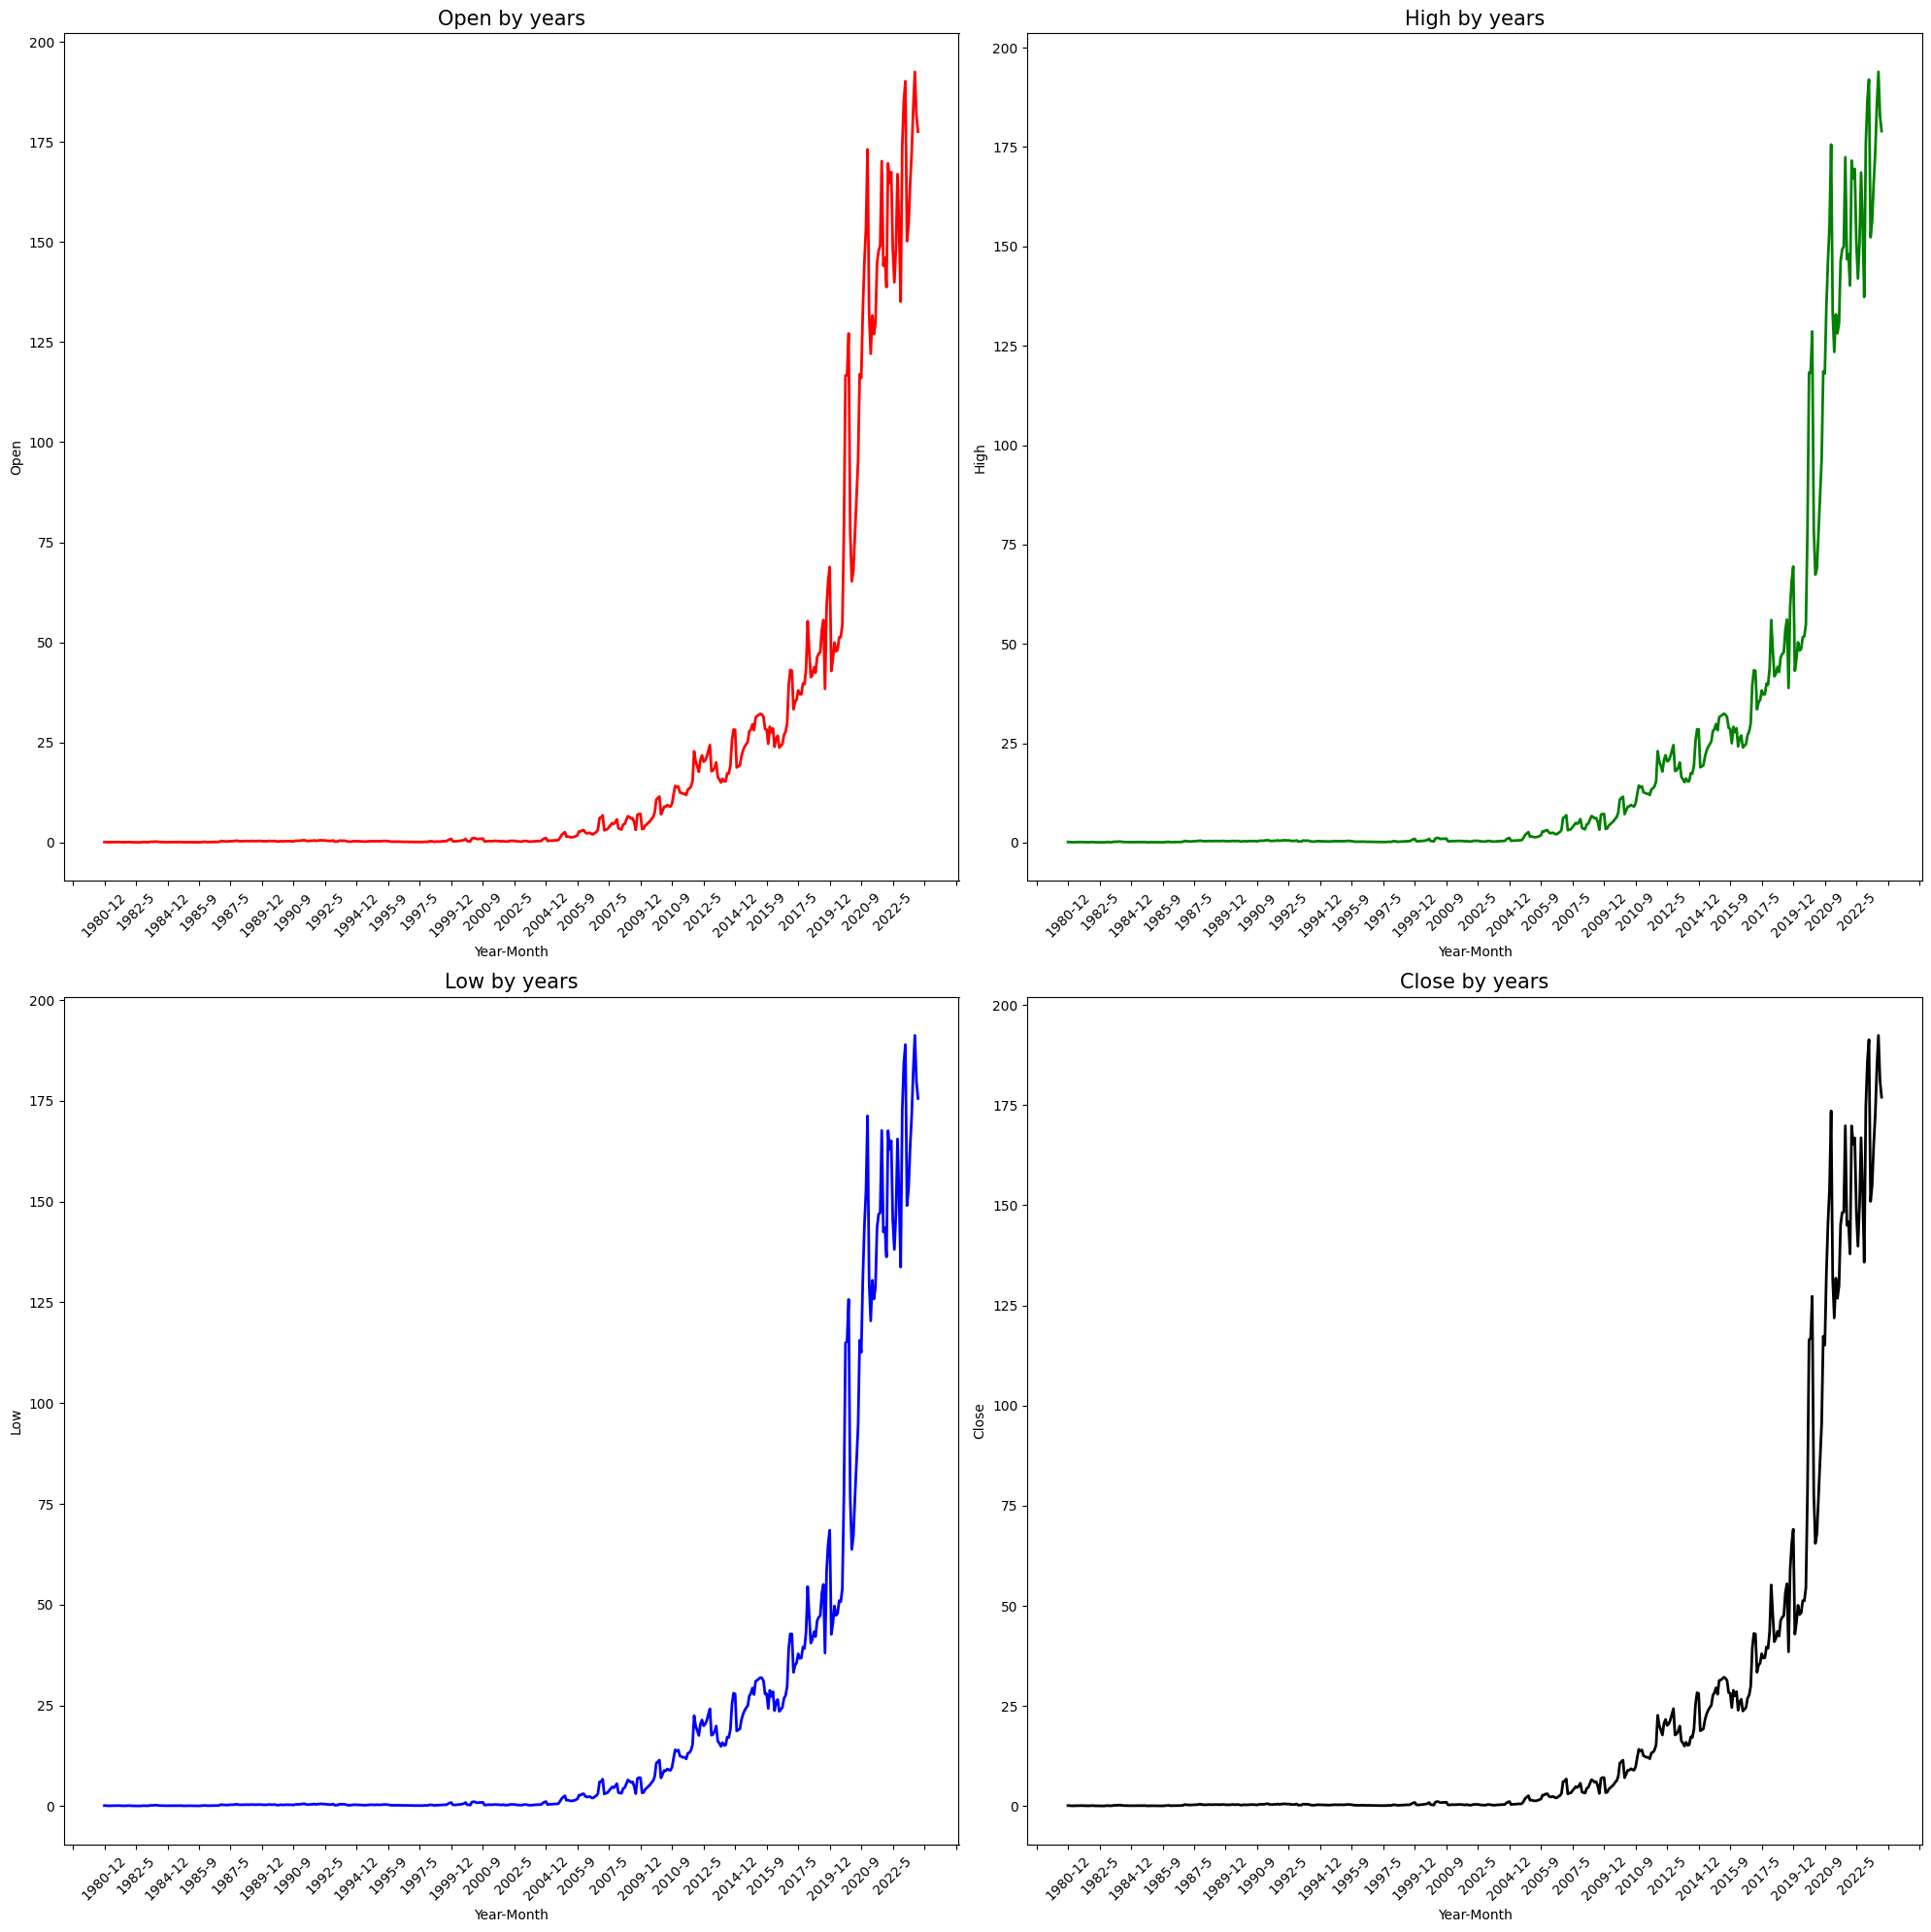

In [336]:
# grouping prices by year-months
data.Date = pd.to_datetime(data.Date)
data['Year-Month'] = data.Date.dt.year.astype(str) + '-' + data.Date.dt.month.astype(str)
grouped_prices = data[['Open', 'High', 'Low', 'Close']].groupby(by = data['Year-Month']).aggregate(np.mean)
# making plots of mean of each feature that describe the price by year
plt.figure(figsize = (20,20))
colors = ['red', 'green', 'blue', 'black']
for i, col in enumerate(grouped_prices.columns, start = 1):
    plt.subplot(2,2,i)
    sns.lineplot(data = grouped_prices, x = grouped_prices.index, y = col, lw = 2, color = colors[i-1])
    plt.title(f'{col} by years', fontsize = 15)
    plt.gca().xaxis.set_major_locator(MaxNLocator(30))
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show();

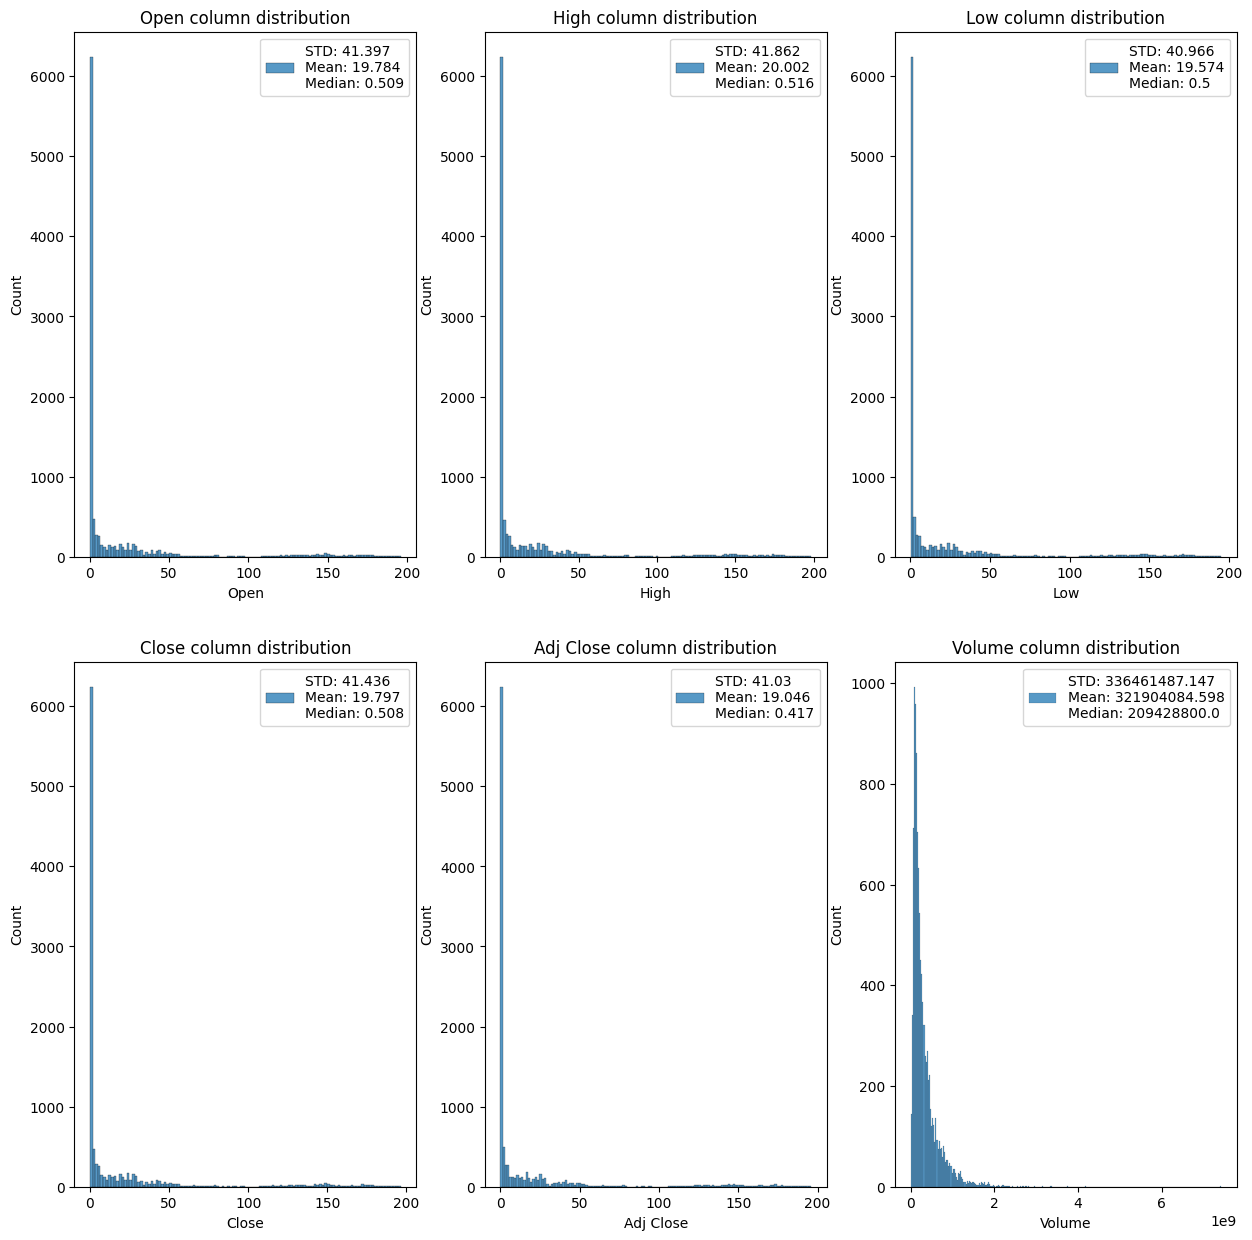

In [337]:
# as the graphs have same behaviour by mean let's plot histograms and look at their distributions
cols = data.columns[1:7]
plt.figure(figsize = (15,15))
for i, col in enumerate(cols, start = 1):
    plt.subplot(2,3,i)
    # define label for characteristics
    label_text = f'STD: {round(data[col].std(), 3)}\nMean: {round(data[col].mean(), 3)}\nMedian: {round(data[col].median(), 3)}'
    sns.histplot(data = data, x = data[col], label = label_text)
    plt.title(f'{col} column distribution')
    plt.legend()
plt.show();

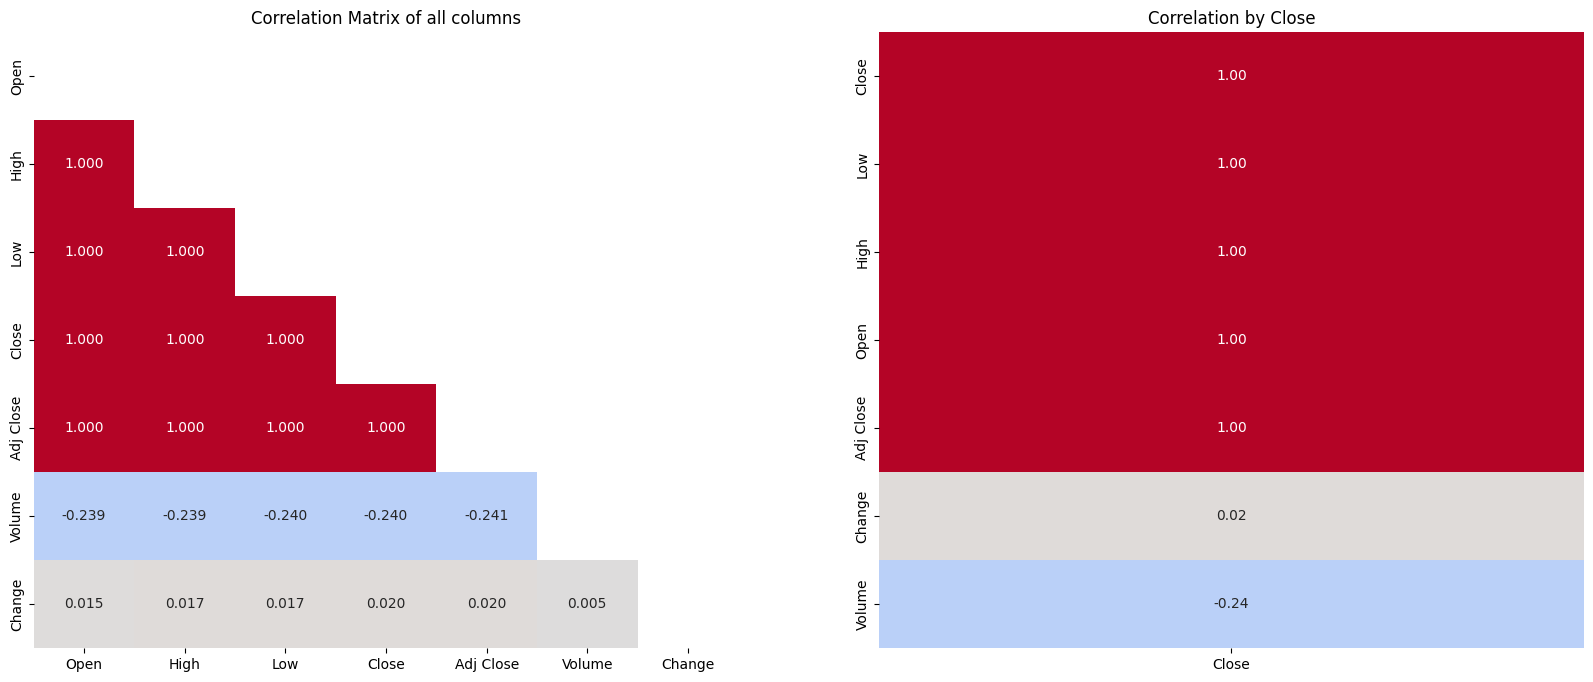

In [338]:
# correlation matrixes
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.heatmap(data = data.corr(numeric_only = True), cmap = 'coolwarm', cbar = False, annot = True, fmt = '.3f', vmin = -1, vmax = 1,
            mask = np.triu(np.ones_like(data.corr(numeric_only = True))))
plt.title('Correlation Matrix of all columns')
plt.subplot(1,2,2)
sns.heatmap(data = data.corr(numeric_only = True)[['Close']].sort_values(ascending = False, by = 'Close'), annot = True, fmt = '.2f',
            cbar = False, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation by Close')
plt.show();

Big correlation between price features, that's not good.

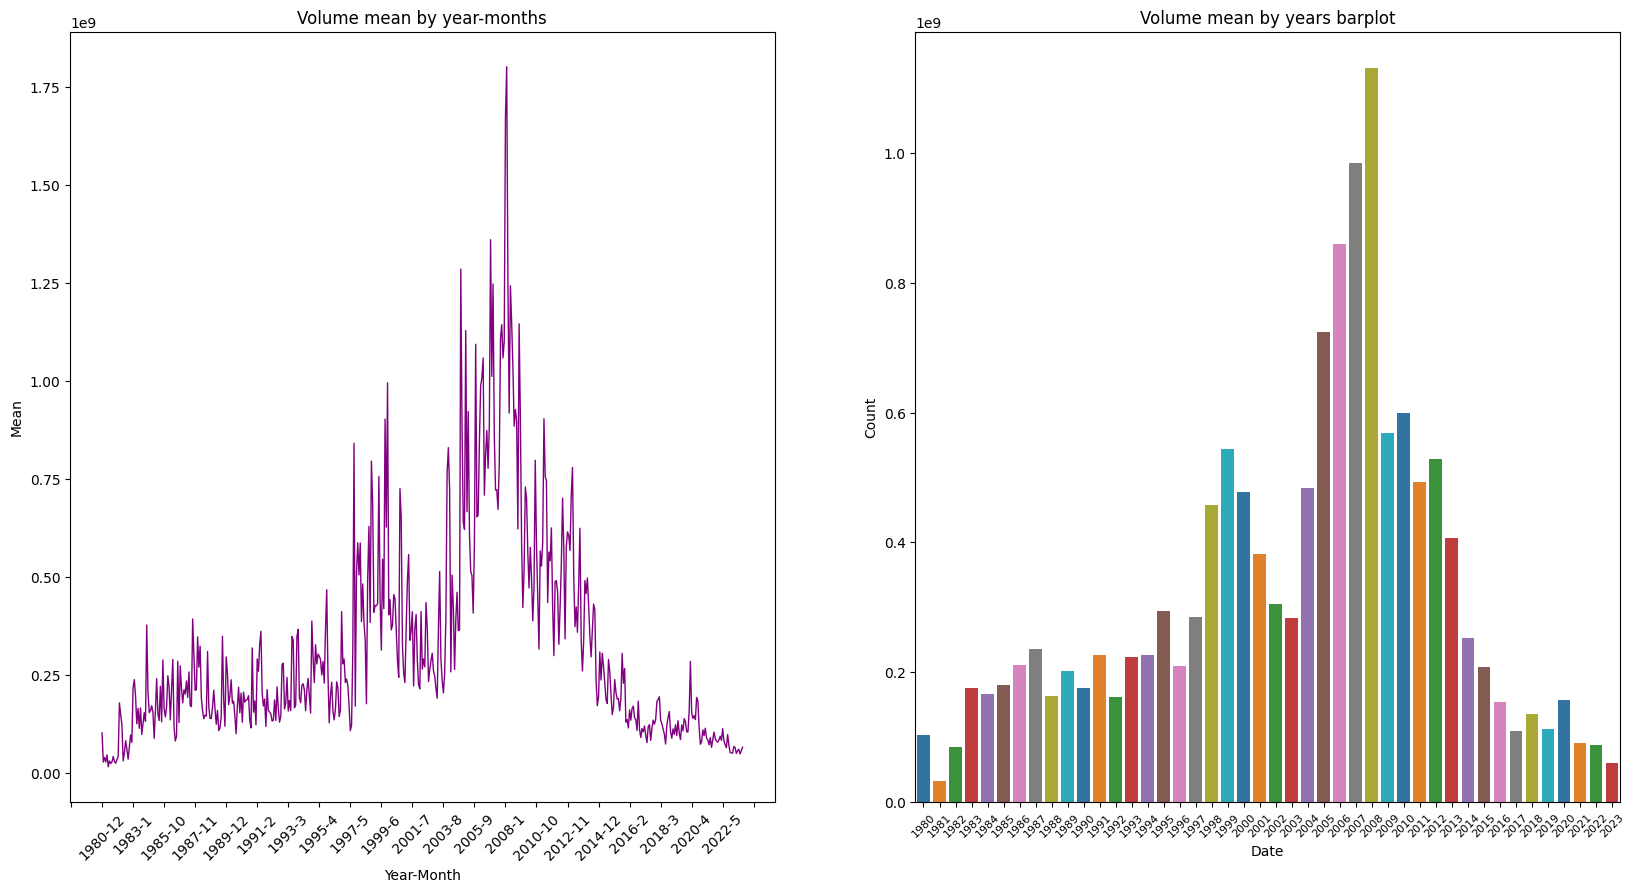

In [339]:
# looking at Volume column
grouped_volume = data.Volume.groupby(by = data['Year-Month']).aggregate([np.mean])
vol_by_year = data.Volume.groupby(by = data.Date.dt.year).aggregate([np.mean])
# plot
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.lineplot(data = grouped_volume, x = grouped_volume.index, y = 'mean', color = 'purple', lw = 1)
plt.gca().xaxis.set_major_locator(MaxNLocator(25))
plt.xticks(rotation = 45)
plt.ylabel('Mean')
plt.title('Volume mean by year-months')
plt.subplot(1,2,2)
sns.barplot(data = vol_by_year, x = vol_by_year.index, y = 'mean', palette = 'tab10')
plt.xticks(rotation = 45, fontsize = 8)
plt.ylabel('Count')
plt.title('Volume mean by years barplot')
plt.show();

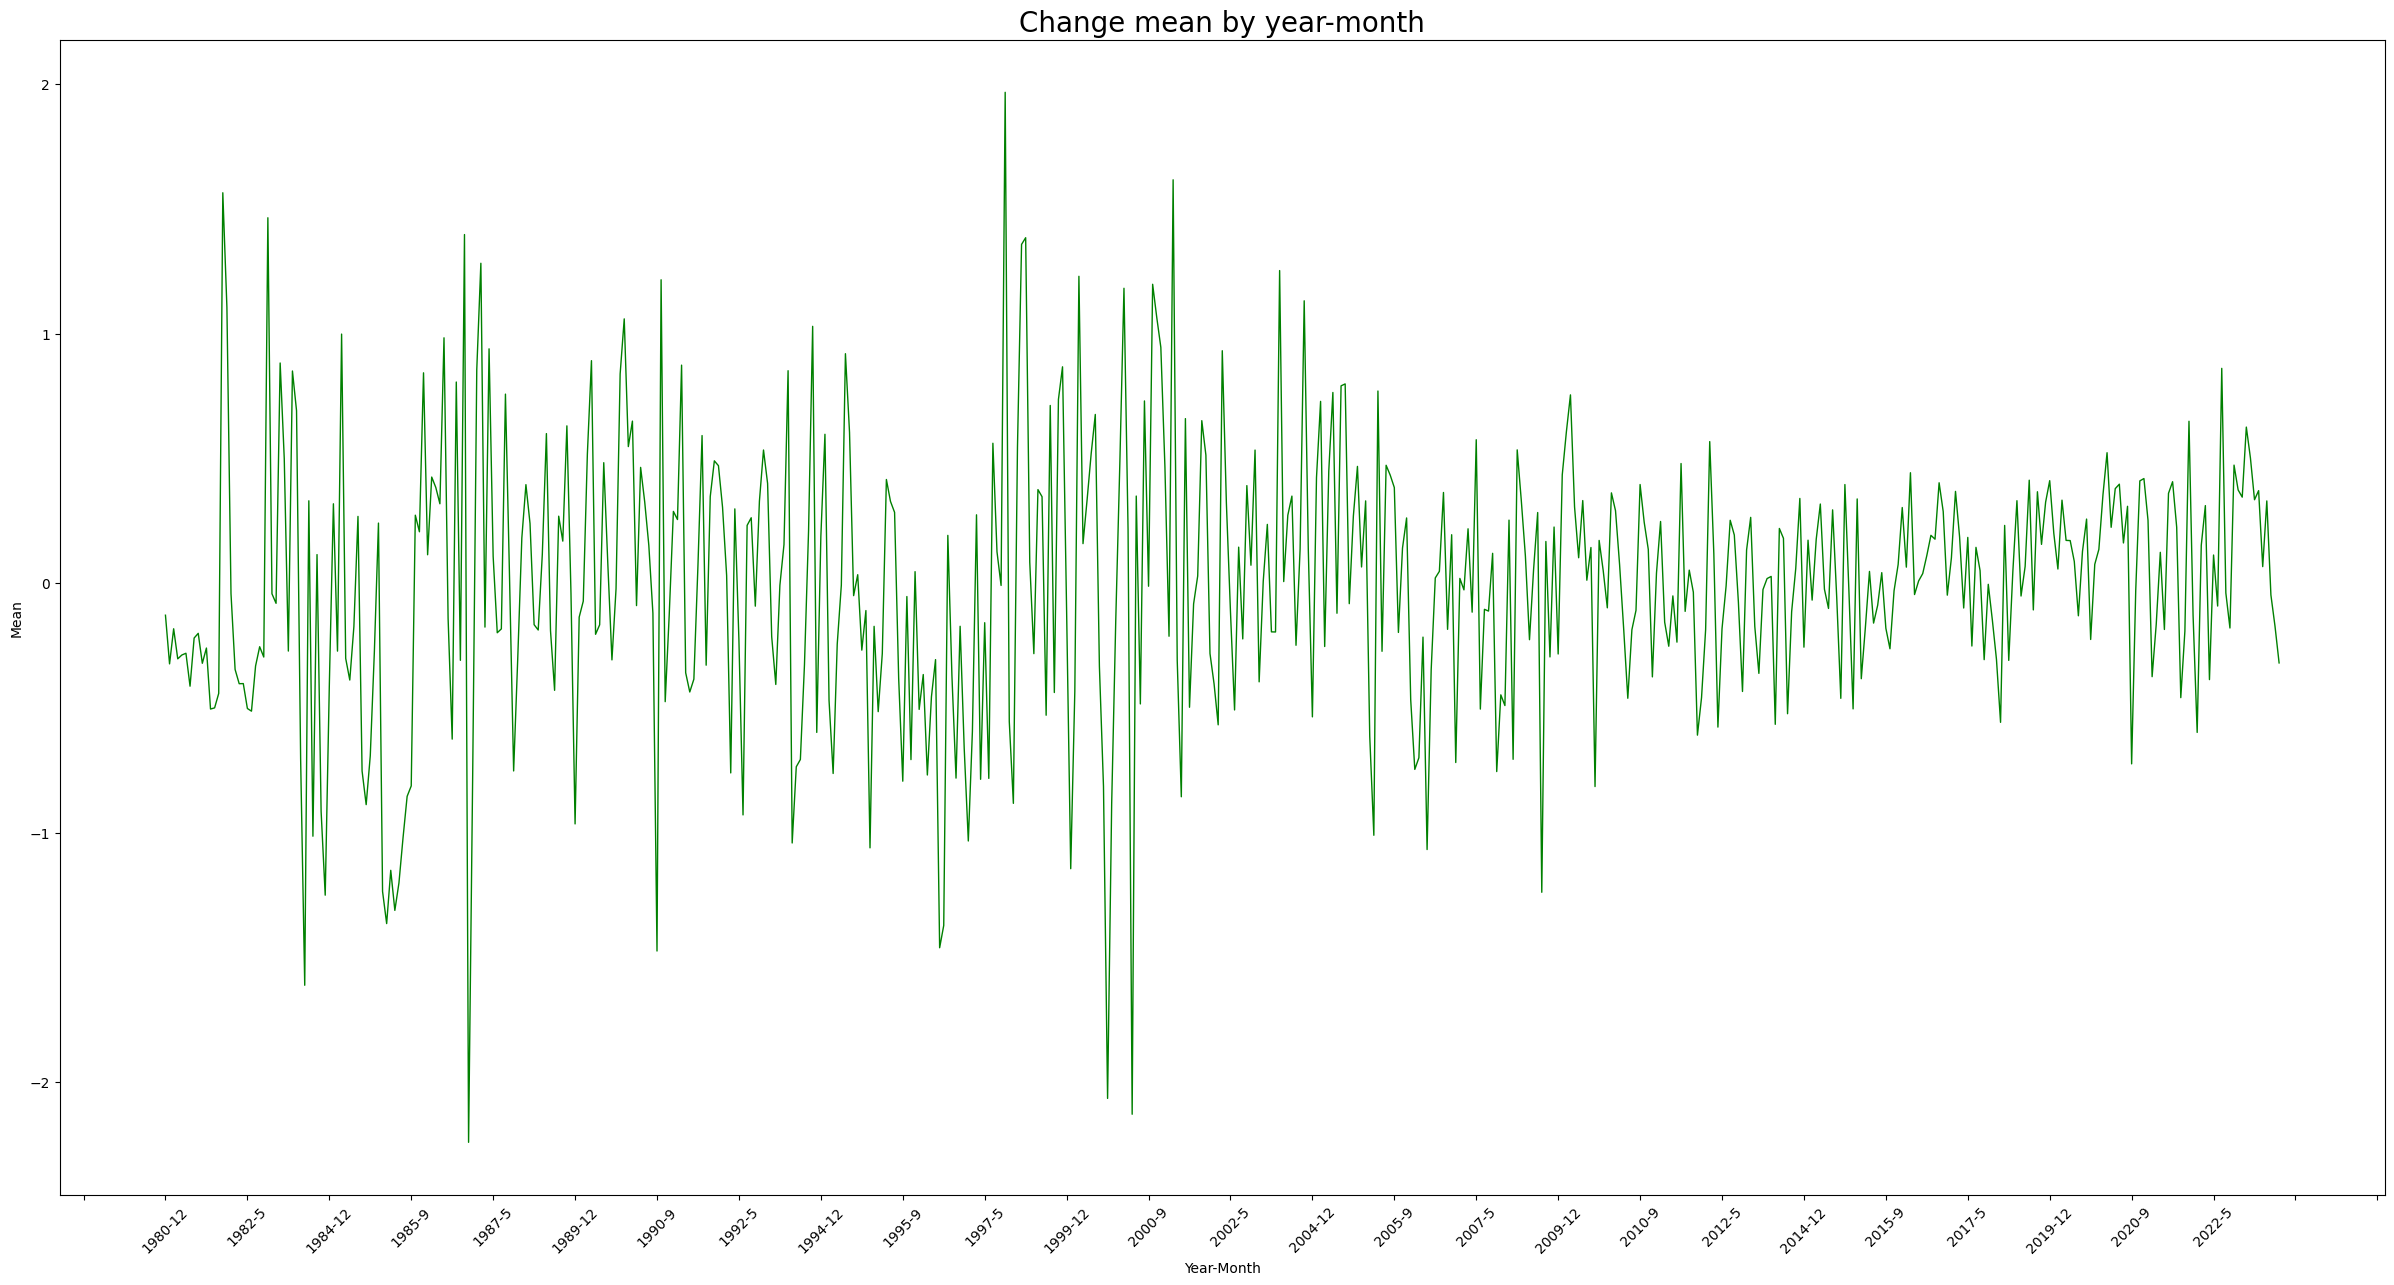

In [340]:
# look at new added column Change.Group by year-month column, calculate the mean change of each month and plot
change_grouped = data.Change.groupby(by = data['Year-Month']).aggregate([np.mean])
plt.figure(figsize = (30,15))
sns.lineplot(data = change_grouped, x = change_grouped.index, y = 'mean', color = 'green', lw = 1)
plt.gca().xaxis.set_major_locator(MaxNLocator(30))
plt.xticks(rotation = 45)
plt.title('Change mean by year-month', fontsize = 20)
plt.ylabel('Mean')
plt.show();

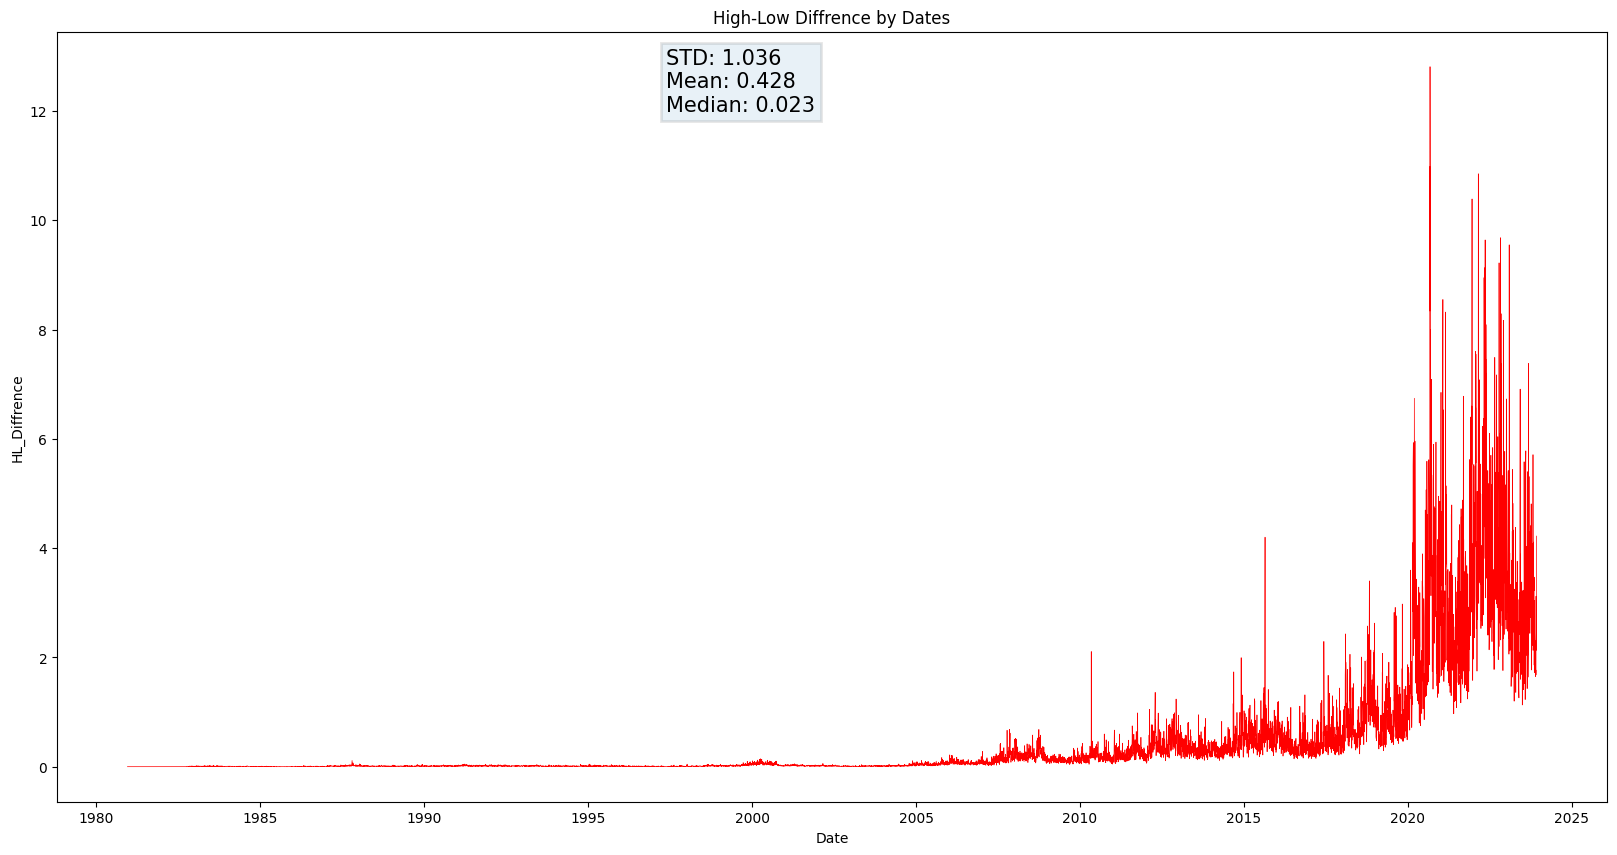

In [341]:
# as High and Low are correlated to Close target column, let's add some new column which will show us a diffrence of that features
data['HL_Diffrence'] = data['High'] - data['Low']
plt.figure(figsize = (20,10))
sns.lineplot(data = data, x = 'Date', y = 'HL_Diffrence', lw = 0.5, color = 'red')
plt.title('High-Low Diffrence by Dates')
hl_std = data['HL_Diffrence'].std()
hl_mean = data['HL_Diffrence'].mean()
hl_median = data['HL_Diffrence'].median()
text_for_plot = f'STD: {round(hl_std, 3)}\nMean: {round(hl_mean, 3)}\nMedian: {round(hl_median, 3)}'
plt.text(x = 10000, y = 12, s = text_for_plot, bbox = dict(alpha = 0.1, linewidth = 2), fontsize = 15)
plt.show();

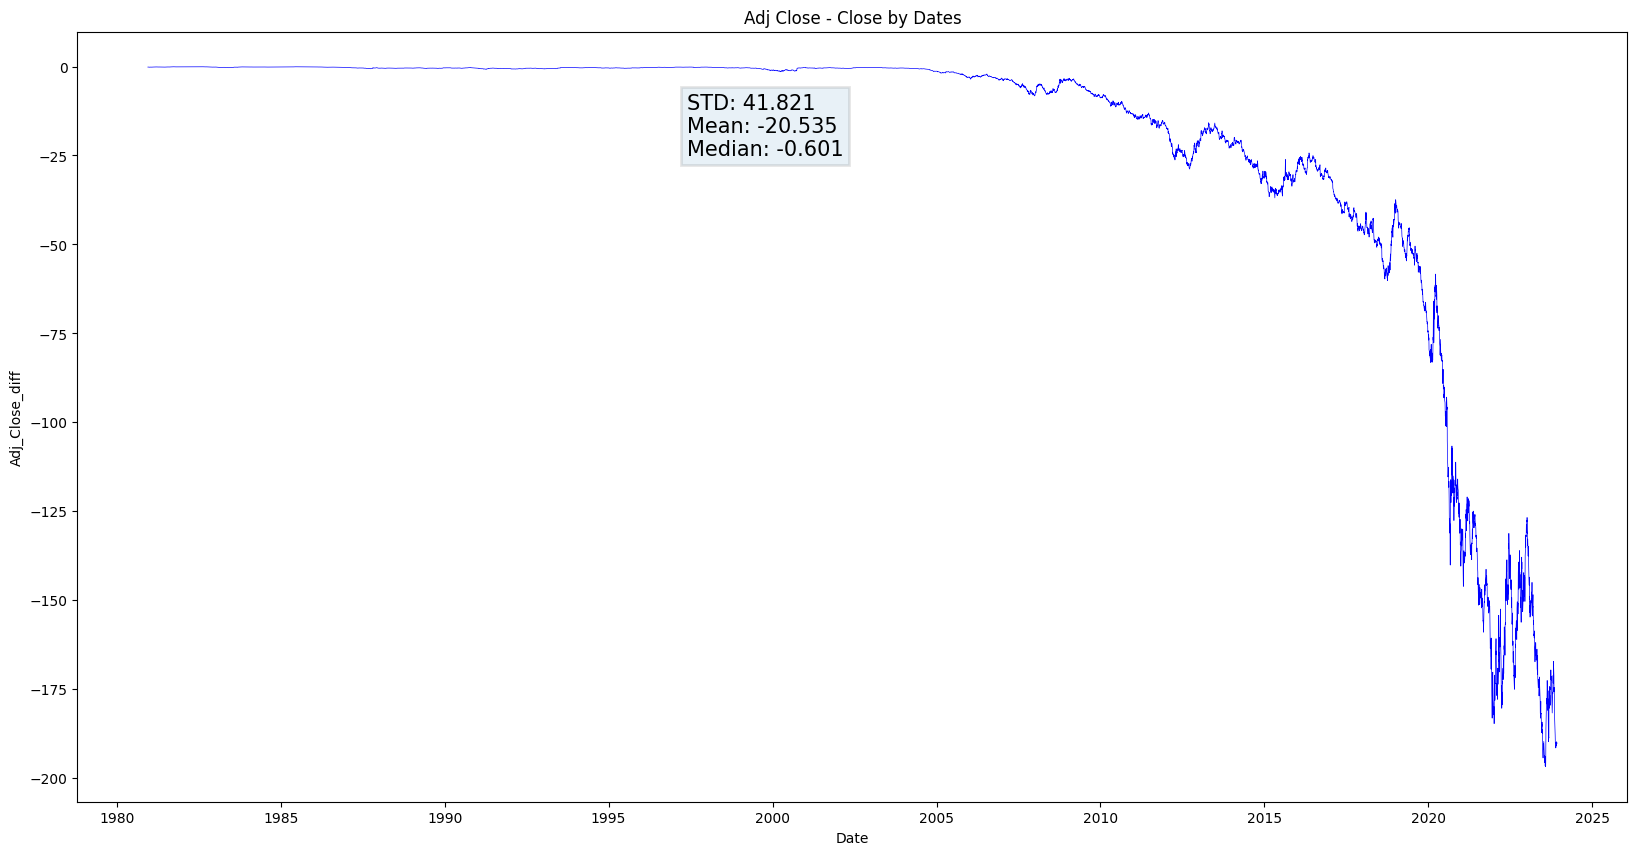

In [342]:
# same with Adj Close column
data['Adj_Close_diff'] = (data['Adj Close'] - data['Close']) - data['Open']
plt.figure(figsize = (20,10))
sns.lineplot(data = data, x = 'Date', y = 'Adj_Close_diff', lw = 0.5, color = 'blue')
plt.title('Adj Close - Close by Dates')
adj_std = data['Adj_Close_diff'].std()
adj_mean = data['Adj_Close_diff'].mean()
adj_median = data['Adj_Close_diff'].median()
text_for_plot = f'STD: {round(adj_std, 3)}\nMean: {round(adj_mean, 3)}\nMedian: {round(adj_median, 3)}'
plt.text(x = 10000, y = -25, s = text_for_plot, bbox = dict(alpha = 0.1, linewidth = 2), fontsize = 15)
plt.show();

__Data Preparation.__

In [344]:
# define X and y
X = data.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Year-Month'], axis = 1)
y = data[['Close']]

In [346]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.describe()

,Volume,Change,HL_Diffrence,Adj_Close_diff
count,1.083600e+04,1.083600e+04,1.083600e+04,1.083600e+04
mean,-1.258990e-16,-1.967173e-17,-4.196635e-17,8.393270e-17
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-9.567780e-01,-1.060983e+01,-4.128751e-01,-4.213955e+00
25%,-6.106790e-01,-4.886700e-01,-4.042575e-01,-1.561905e-02
50%,-3.343042e-01,1.160018e-03,-3.902545e-01,4.766725e-01
75%,2.373122e-01,4.747461e-01,-1.239403e-01,4.827850e-01
max,2.110216e+01,8.395712e+00,1.195038e+01,4.895979e-01


In [347]:
# split to train-test-validation splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.1, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (8776, 4)
X_test shape: (1084, 4)
X_val shape: (976, 4)
y_train shape: (8776, 1)
y_test shape: (1084, 1)
y_val shape: (976, 1)


__Model building.__

In [361]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

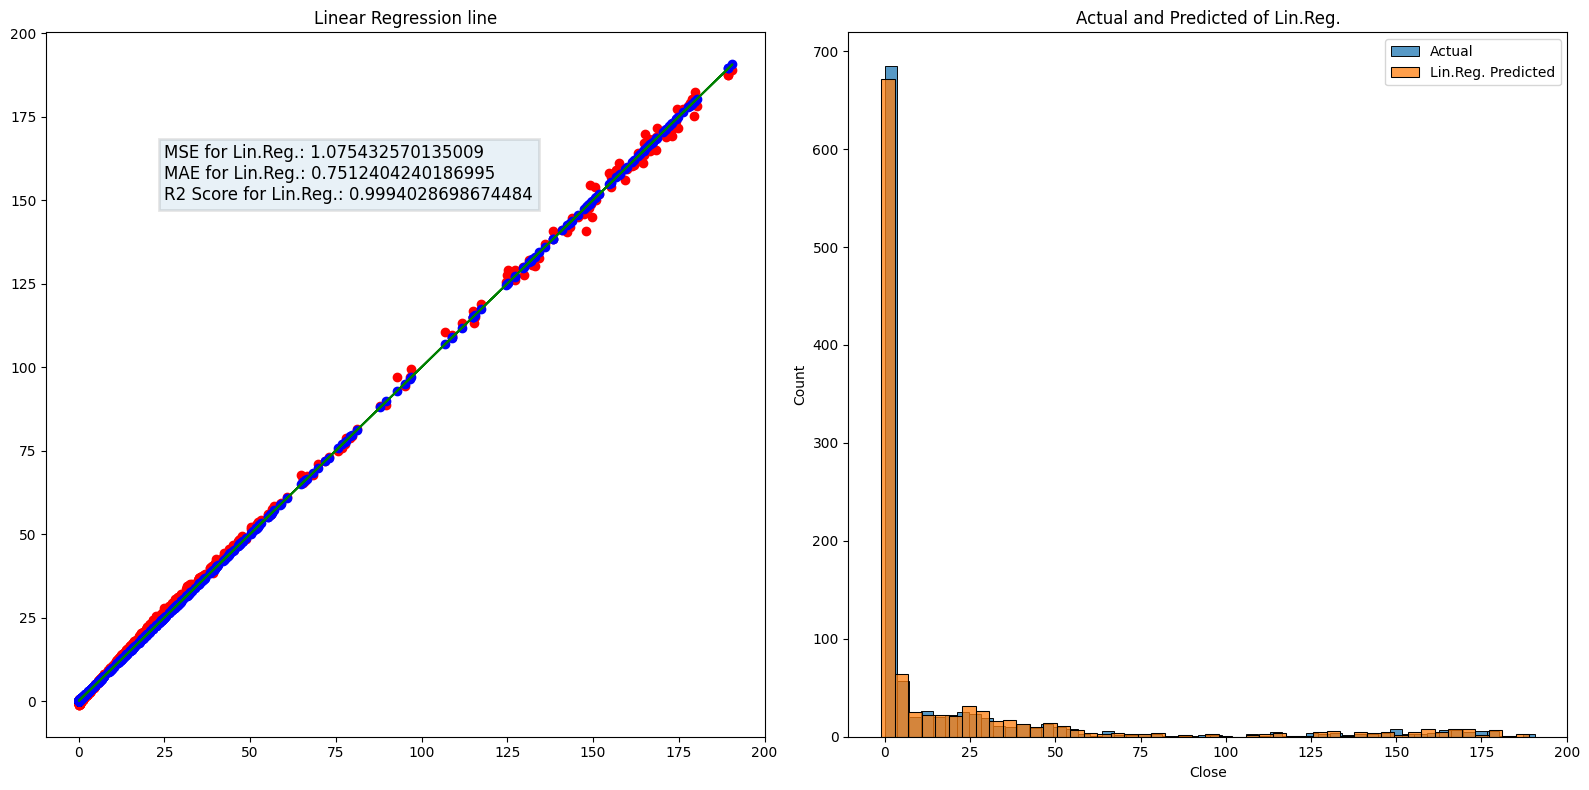

In [397]:
# let's check linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_pred = lm.predict(X_test)
plt.figure(figsize = (16, 8))
plt.subplot(1,2,1)
plt.scatter(y_test, lm_pred, color = 'red', marker = 'o');
plt.scatter(y_test, y_test, color = 'blue', marker = 'o');
plt.plot(y_test, y_test, color = 'green');
plt.title('Linear Regression line')
text_for_plot = f'MSE for Lin.Reg.: {mean_squared_error(y_test, lm_pred)}\nMAE for Lin.Reg.: {mean_absolute_error(y_test, lm_pred)}\n\
R2 Score for Lin.Reg.: {r2_score(y_test, lm_pred)}'
plt.text(x = 25, y = 150, s = text_for_plot, bbox = dict(alpha = 0.1, linewidth = 2), fontsize = 12)
plt.subplot(1,2,2)
sns.histplot(x = y_test.Close, label = 'Actual')
sns.histplot(x = lm_pred.flatten(), label = 'Lin.Reg. Predicted')
plt.title('Actual and Predicted of Lin.Reg.')
plt.legend()
plt.tight_layout()
plt.show();

In [352]:
# getting parameters of linear regression
lm_params = pd.DataFrame(data = lm.coef_, columns = X.columns)
lm_params['Intercept'] = lm.intercept_
lm_params

,Volume,Change,HL_Diffrence,Adj_Close_diff,Intercept
0,-0.100371,0.185001,0.020669,-41.387291,19.799634


In [365]:
# building of XGB
xgb_params = {
    'booster':['gbtree', 'gblinear', 'dart'],
    'eta':[0.0001, 0.001, 0.01, 0.1, 1],
    'max_depth':[2,3,4,5,6,7,8]
}

xgb_t = GridSearchCV(XGBRegressor(), xgb_params, cv = 5, verbose = 0, n_jobs = -1)
xgb_t.fit(X_val, y_val)
print(f'Best score for current hyperparameters: {xgb_t.best_score_}')
print(f'Best hyperparamerts: {xgb_t.best_params_}')

/home/armh12/miniconda3/envs/TF/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:04:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/home/armh12/miniconda3/envs/TF/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:04:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/home/armh12/miniconda3/envs/TF/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:04:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/home/armh12/miniconda3/envs/TF/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:04:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/home/armh12/miniconda3/envs/TF/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:0

Best score for current hyperparameters: 0.9991579232200829
Best hyperparamerts: {'booster': 'gblinear', 'eta': 1, 'max_depth': 2}


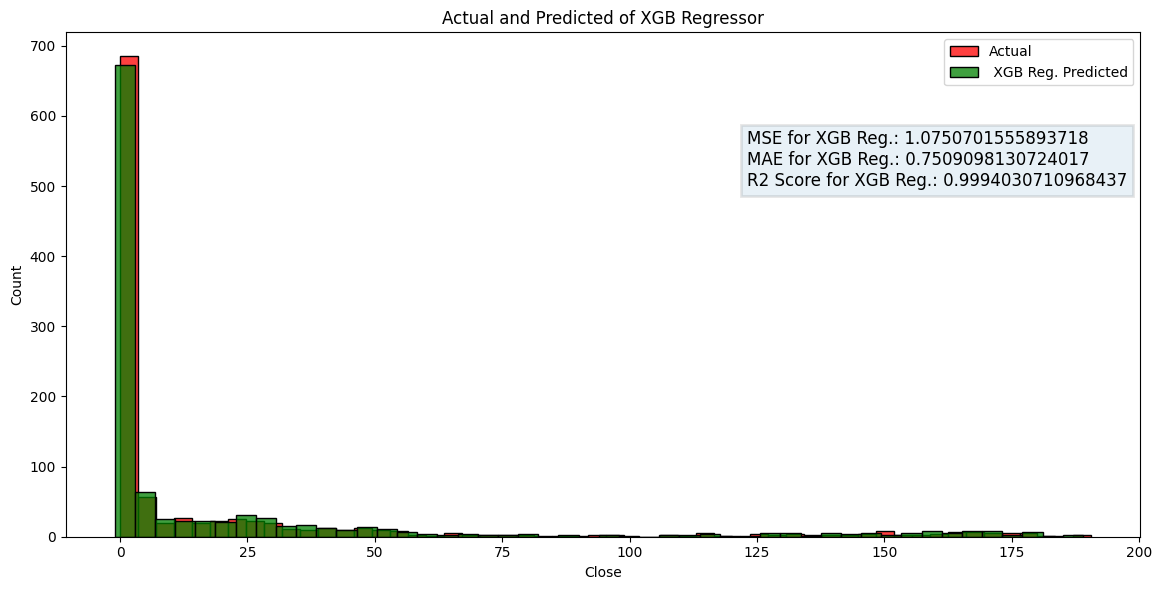

In [402]:
# train XGBRegressor
xgb = XGBRegressor(**xgb_t.best_params_)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
plt.figure(figsize = (12,6))
sns.histplot(x = y_test.Close, label = 'Actual', color = 'red')
sns.histplot(x = xgb_pred.flatten(), label = ' XGB Reg. Predicted', color = 'green')
text_for_plot = f'MSE for XGB Reg.: {mean_squared_error(y_test, xgb_pred)}\nMAE for XGB Reg.: {mean_absolute_error(y_test, xgb_pred)}\n\
R2 Score for XGB Reg.: {r2_score(y_test, xgb_pred)}'
plt.text(x = 123, y = 500, s = text_for_plot, bbox = dict(alpha = 0.1, linewidth = 2), fontsize = 12)
plt.title('Actual and Predicted of XGB Regressor')
plt.legend()
plt.tight_layout()
plt.show();

I did analysis with very simillar dataset about Netflix Stock Prices, where columns were absolutely the same.The only diffrence is row count.
I did some mistake there about including columns which were high-correlated with target.In this dataset, I have done deeper Feature Engineering by including change of open and close, diffrence of high and low prices and diffrence of some misscalculations, which have described in Adj Close feature.This analysis is more correct then in Netflix Stock Prices folder.

Also, we've used XGB Regressor here, which have performed very well, better than Gradient Boosting Regressor from Scikit-Learn library in Netflix Stock Prices analysis notebook.